In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
uselog = pd.read_csv('C:\\Users\\user\\jupyter\\100knock-data_analytics\\3章\\use_log.csv')
customer = pd.read_csv('C:\\Users\\user\\jupyter\\100knock-data_analytics\\3章\\customer_master.csv')
class_master = pd.read_csv('C:\\Users\\user\\jupyter\\100knock-data_analytics\\3章\\class_master.csv')
campaign_master = pd.read_csv('C:\\Users\\user\\jupyter\\100knock-data_analytics\\3章\\campaign_master.csv')

In [2]:
print(f'uselog:{len(uselog)}')
print(f'customer:{len(customer)}')
print(f'class_master:{len(class_master)}')
print(f'campaign_master:{len(campaign_master)}')

uselog:197428
customer:4192
class_master:3
campaign_master:3


In [3]:
uselog.head(3)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01


In [4]:
customer.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
class_master

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
campaign_master

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [7]:
customer_join = pd.merge(customer, class_master, how='left', on='class')
customer_join = pd.merge(customer_join, campaign_master, how='left', on='campaign_id')

In [8]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [9]:
print(customer_join.groupby('class_name').count()['customer_id'],
customer_join.groupby('campaign_name').count()['customer_id'],
customer_join.groupby('gender').count()['customer_id'],
customer_join.groupby('is_deleted').count()['customer_id'])
customer_join

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64 campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64 gender
F    1983
M    2209
Name: customer_id, dtype: int64 is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常


In [10]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
drop_index = customer_join.loc[customer_join['end_date'] < pd.to_datetime('2019-03-31')].index
customer_newer = customer_join.drop(drop_index)
print(len(customer_newer),
customer_newer['end_date'].unique())
customer_join

2953 <DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常


In [11]:
print(customer_newer.groupby('class_name').count()['customer_id'],
customer_newer.groupby('campaign_name').count()['customer_id'],
customer_newer.groupby('gender').count()['customer_id'],
customer_newer.groupby('is_deleted').count()['customer_id'])

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64 campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64 gender
F    1400
M    1553
Name: customer_id, dtype: int64 is_deleted
0    2842
1     111
Name: customer_id, dtype: int64


In [12]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_month = uselog.groupby(['年月','customer_id']).count()
uselog_month

log_id  usedate
年月     customer_id                 
201804 AS002855          4        4
       AS009013          2        2
       AS009373          3        3
       AS015315          6        6
       AS015739          7        7
...                    ...      ...
201903 TS995853          8        8
       TS998593          8        8
       TS999079          3        3
       TS999231          6        6
       TS999855          4        4

[36842 rows x 2 columns]

In [13]:
uselog_month.rename(columns={'log_id':'count'}, inplace=True)

In [14]:
del uselog_month['usedate']
uselog_month.head()

count
年月     customer_id       
201804 AS002855         4
       AS009013         2
       AS009373         3
       AS015315         6
       AS015739         7

In [15]:
uselog_customer = uselog_month.groupby('customer_id').agg(['mean','median','max','min'])['count']
uselog_customer.head()

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4


In [16]:
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [17]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id','年月','weekday'], as_index=False).count()[['customer_id','年月','weekday','log_id']]
uselog_weekday.head()

,customer_id,年月,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [18]:
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [19]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id','count']]
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [20]:
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4,1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [21]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']], on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0


In [22]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join.loc[i, 'membership_period'] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [23]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

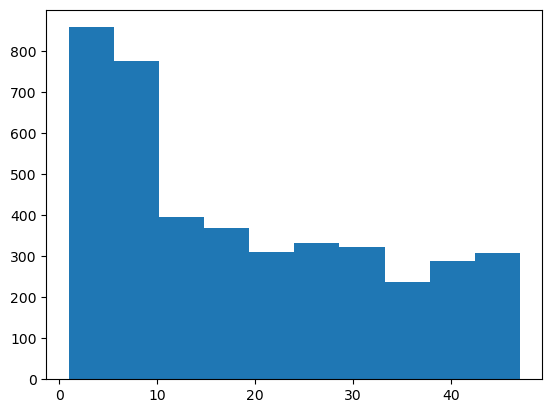

In [25]:
plt.hist(customer_join['membership_period'])

In [31]:
customer_end = customer_join.loc[customer_join['is_deleted']==1,['is_deleted', 'price', 'mean', 'median', 'max', 'min', 'routine_flg','membership_period']]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [32]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0, ['is_deleted', 'price', 'mean', 'median', 'max', 'min', 'routine_flg','membership_period']]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [33]:
customer_join.to_csv('customer_join.csv', index=False)